In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
type(fashion_mnist.load_data())

tuple

In [4]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [5]:
#ref:https://towardsdatascience.com/understanding-input-and-output-shapes-in-convolution-network-keras-f143923d56ca

X_test.shape

(10000, 28, 28)

In [6]:

#You always have to give a 4D array as input to the CNN. 
#So input data has a shape of (batch_size, height, width, depth), where the first dimension represents 
#the batch size of the image and the other three dimensions represent dimensions of the image which are height,
#width, and depth. For some of you who are wondering what is the depth of the image, 
#it’s nothing but the number of color channels. 
#For example, an RGB image would have a depth of 3, and the greyscale image would have a depth of 1


X_train=np.expand_dims(X_train, -1)
X_test=np.expand_dims(X_test, -1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [9]:
cnn=tf.keras.models.Sequential()

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1),strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu',strides=2))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dropout(0.2))

In [15]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.2))

In [17]:
cnn.add(tf.keras.layers.Dense(units=K,activation='softmax'))

In [18]:
X_train.shape

(60000, 28, 28, 1)

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5843 - accuracy: 0.7976 - val_loss: 0.4305 - val_accuracy: 0.8402
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4066 - accuracy: 0.8482 - val_loss: 0.3880 - val_accuracy: 0.8580
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3674 - accuracy: 0.8621 - val_loss: 0.3724 - val_accuracy: 0.8605
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3467 - accuracy: 0.8703 - val_loss: 0.3527 - val_accuracy: 0.8720
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3243 - accuracy: 0.8788 - val_loss: 0.3542 - val_accuracy: 0.8710
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3105 - accuracy: 0.8825 - val_loss: 0.3491 - val_accuracy: 0.8747
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2958 - accuracy: 0.8881 - val_loss: 0.3517 - val_ac

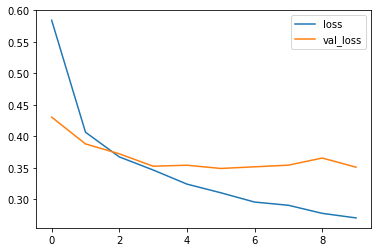

In [21]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

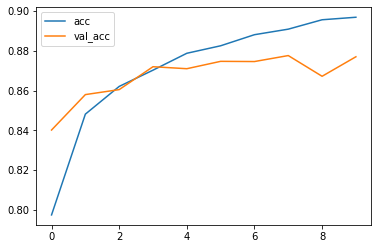

In [22]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [24]:
cnn.predict(X_test).argmax(axis=1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [25]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# find which are wrongly classified

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

In [27]:
confusion_matrix(cnn.predict(X_test).argmax(axis=1),y_test)

array([[847,   2,  17,  13,   0,   0, 151,   0,   0,   1],
       [  1, 973,   1,   3,   2,   0,   2,   0,   1,   0],
       [ 20,   2, 809,  17,  94,   0,  72,   0,   2,   0],
       [ 16,  16,   8, 893,  28,   0,  29,   0,   2,   0],
       [  4,   3,  63,  41, 759,   0,  89,   0,   7,   0],
       [  1,   0,   0,   1,   0, 957,   0,   9,   2,   3],
       [103,   4, 102,  32, 115,   0, 645,   0,  11,   0],
       [  0,   0,   0,   0,   0,  32,   0, 982,   2,  64],
       [  8,   0,   0,   0,   2,   4,  12,   0, 973,   0],
       [  0,   0,   0,   0,   0,   7,   0,   9,   0, 932]], dtype=int64)

In [28]:
p_test=cnn.predict(X_test).argmax(axis=1)

In [31]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

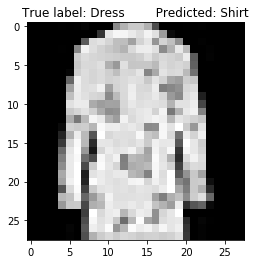

In [33]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s        Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

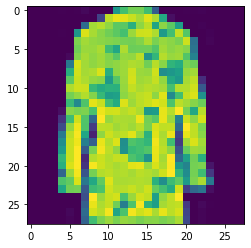

In [35]:
plt.imshow(X_test[i].reshape(28,28))